In [1]:
import numpy as np
import pandas as pd
import matplotlib
# %matplotlib notebook
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
linmod = LinearRegression()

In [2]:
datafile = '../../dataset/ch09/movie_profits.txt'
movie_profits = pd.read_csv(datafile, sep='\t')

movie_profits = movie_profits.rename(columns={
            'US Gross ($M)': 'gross',
            'Budget ($M)': 'budget', 
            'Run Time (min)': 'runtime', 
            'Critic Score (Rotten Tomatoes)': 'critics'
})

In [3]:
movie_profits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     609 non-null    int64  
 1   Movie    609 non-null    object 
 2   gross    609 non-null    float64
 3   budget   609 non-null    float64
 4   runtime  609 non-null    int64  
 5   critics  609 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 28.7+ KB


In [4]:
movie_profits

,Year,Movie,gross,budget,runtime,critics
0,2012,Django Unchained,162.805434,100.0,165,88
1,2012,Parental Guidance,77.264926,25.0,105,18
2,2012,The Impossible,19.019882,40.0,114,81
3,2012,Jack Reacher,80.070736,60.0,130,61
4,2012,This is 40,67.544505,35.0,134,51
...,...,...,...,...,...,...
604,2008,Mad Money,20.688843,22.0,104,22
605,2008,27 Dresses,76.808654,30.0,111,41
606,2008,Cloverfield,80.048433,25.0,85,77
607,2008,In the Name of the King: A Dungeon Siege Tale,4.775656,60.0,127,4


In [5]:
movie_profits.head()

,Year,Movie,gross,budget,runtime,critics
0,2012,Django Unchained,162.805434,100.0,165,88
1,2012,Parental Guidance,77.264926,25.0,105,18
2,2012,The Impossible,19.019882,40.0,114,81
3,2012,Jack Reacher,80.070736,60.0,130,61
4,2012,This is 40,67.544505,35.0,134,51


**Problem 3. Movie profits What can predict how much a motion picture will make? We have data on 609 recent releases that includes the USGross (in $M), the Budget ($M), the Run Time (minutes), and the score given by the critics on the Rotten Tomatoes website. The first several entries in the data table look like this:We want a regression model to predict USGross. Parts of the regression output computed in Excel look like this:**

**a) Write the multiple regression equation.**

**Answer:** 

$\widehat{USGross} = - 52.3692 + 0.9723 \times Budget + 0.3872\times RunTime + 0.6403\times CriticScore$

**b) What is the interpretation of the coefficient of Budget in this
regression model?**

**Answer:** The coefficient of Budget ~are~ intercepting with other preditors(Run Time and Critic Score) in the regression.  If we consider the movies with a given amount of Run Time and Critic Score, those that add more fund to the budget then the box office of the US Gross may have more in returns.

<font color="red"> Correction: The coefficient of *budget*, i.e., $0.9723$ suggests that increase in the budget by a million dollars on average may generate a $\$972,300$ return in the U.S. market, when all other factors remain unchange.</font>

**Problem 4. Movie profits again A middle manager at an entertainment
company, upon seeing the analysis of Exercise 3, concludes that longer movies make more money. He argues that his company’s films should all be padded by 30 minutes to improve their gross. Explain the flaw in his interpretation of this model.**


**Answer:** The regression includes three preditors (Budget, Run Time and Critic Score).  If we consider the movies with a**n** equal given amount of Budget and a same given amount of Critic Score, and add more time to the Run Time may result a higher US Gross box office.

<font color="red"> <p> Correction: All else equal, movies of longer run time appear to make more money.  The coefficient of run time is $0.3872$, indicating that each extra minute of run time brings in $\$387,200$ more box office income in the U.S.</p></font>

<font color="red"> <p>However, the middle manager's reasoning is flawed.  The positive coefficient relies on the assumption that all other factors remain unchanged and only the run time factor may change to affect the response.  The middle manager should not conclude that run time along changes how much money a movie makes.  In gneral, we expect the ticket selling of a movie mostly depends on its quality, production, director and staring actors/actresses, marketing effort, etc.  Most money-making movies are not successful because they are long.</p></font>

**Problem 5. More movies profits For the movies examined in Exercise 3, here is a scatterplot of USGross vs. Budget:**

<font color="red"> Use double square bracket ("[[...]]") to extract a dataframe directly, then no need to reshape.  Call ".values" to extract values. </font>

In [6]:
x = movie_profits[ ['budget'] ].values  # note the changes here
y = movie_profits['gross'].values

In [7]:
# x = np.array(x).reshape(-1, 1)
linmod.fit(x, y);
y_hat = linmod.predict(x)
r = linmod.score(x, y)
print(f'R_squared: {r * 100:.1f}%')

R_squared: 46.7%


<font color="red"> Adjust the size and color of scatters.  Add the fitting line. </font>

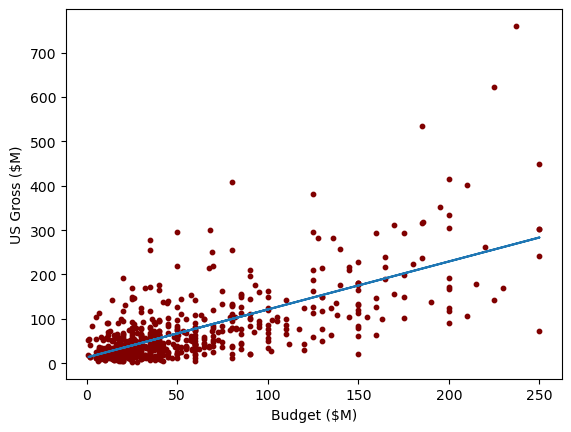

In [8]:
plt.figure()
plt.scatter(x, y, s=10, c='maroon')  # adjust size and color
plt.plot(x, linmod.predict(x))
plt.xlabel('Budget ($M)')
plt.ylabel('US Gross ($M)');

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


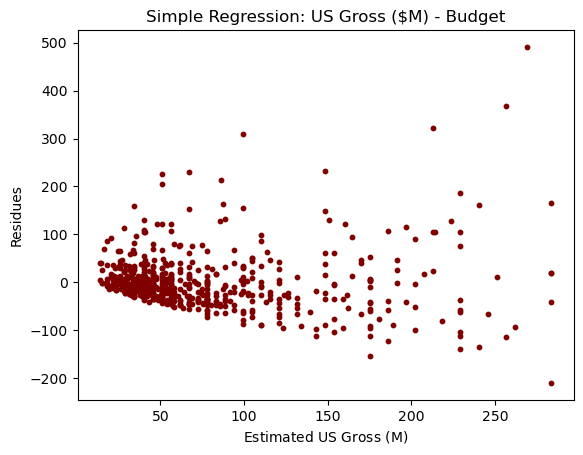

In [9]:
residues = y - y_hat
plt.scatter(y_hat, residues, color='maroon', s=10);
plt.xlabel('Estimated US Gross ($M)$')
plt.ylabel('Residues')
plt.title('Simple Regression: US Gross ($M) - Budget');

**a) Linearity condition**

**Answer:** (1) there is a bend in the plot, (2) its residual plot thickens and (3) it may have outlier(s) that should be reexamined or removed.

<font color="red"> Comments: remove the outliers on the right corresponding to high-budget movies may resolve some of the issues.  Some datasets exhibit the characteristic of different sampling density.  In these plots, we can see that there are move movies with lower budget and U.S. gross. </font>

**b) Equal Spread condition**

**Answer:** the plot of residuals against predicted values is thickening. In addition, some residuals seem unusually large and could deserve more attention.

<font color="red"> The question asks you to examine the histogram of residues.  See below.  Except for a few outliers on the right, the distribution seems symmetric.  Again, remove outliers may solve the issues. </font>

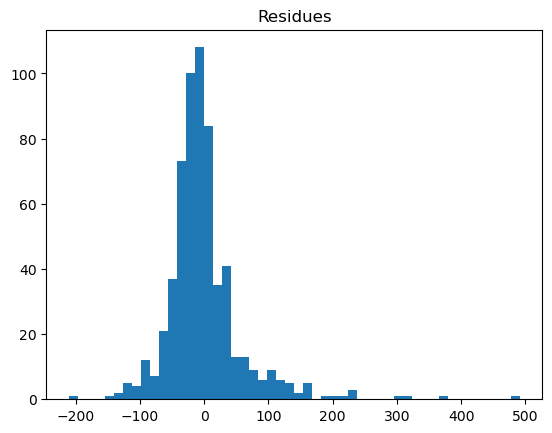

In [10]:
x = movie_profits[['budget']].values
y = movie_profits['gross'].values
# x = np.array(x).reshape(-1, 1)
linmod.fit(x, y);
y_hat = linmod.predict(x)
r = linmod.score(x, y)

residues = y - y_hat
plt.hist(residues, bins = 50)
plt.title("Residues");

**c) Normality assumption**

**Answer:** the histogram of the residuals of the distribution is unimodal, however, it is not symmetric and with obvious outliers.

<font color="red"> Normality cannot be easily checked by observing the histogram.  Need to check the normality plot.  The scatters in below plot significantly deviate from the red line, suggesting non-normal distribution.  The pvalue reported is around $10^{-77}$, a value so small that normality is rejected.  Remove outliers may improve the result.</font>

NormaltestResult(statistic=354.9953196180006, pvalue=8.198715080855582e-78)


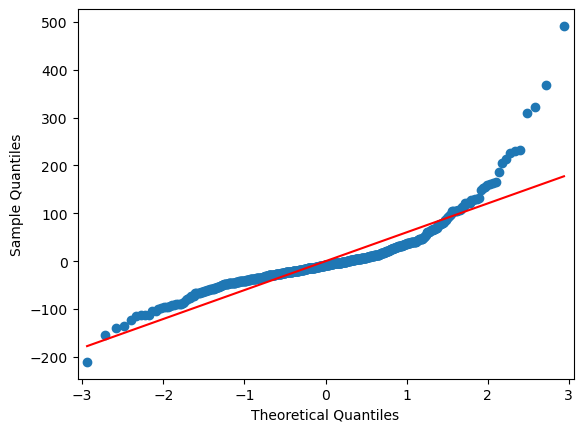

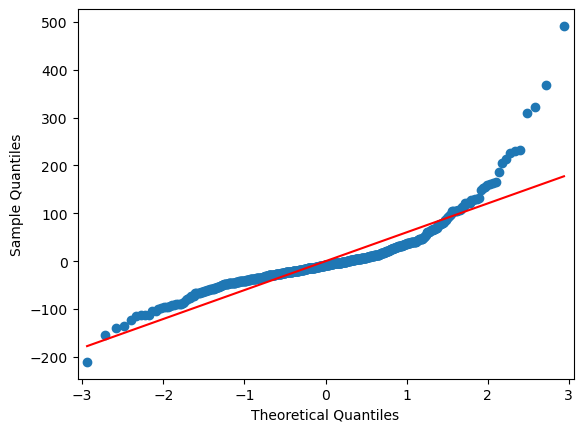

In [11]:
from scipy.stats import normaltest
print(normaltest(residues))
import statsmodels.graphics.gofplots as gofplots
gofplots.ProbPlot(residues).qqplot(line='s')

**Problem 6. Movie residuals For the movies regression in Exercise 3, here is a histogram of the residuals. What does it tell us about the Assumptions and Conditions below?**

In [12]:
x = movie_profits[ ['budget', 'runtime', 'critics'] ]
y = movie_profits['gross']

In [13]:
linmod.fit(x, y);
y_hat = linmod.predict(x)
residues = y - y_hat
r = linmod.score(x, y)
print(f'R_squared: {r * 100:.1f}%')

R_squared: 51.7%


In [14]:
print(f'Budget ($M) coef: {linmod.coef_[0]:.4f}')
print(f'Run Time (min) coef: {linmod.coef_[1]:.4f}')
print(f'Critic Score (Rotten Tomatoes) coef: {linmod.coef_[1]:.4f}')

Budget ($M) coef: 0.9723
Run Time (min) coef: 0.3872
Critic Score (Rotten Tomatoes) coef: 0.3872


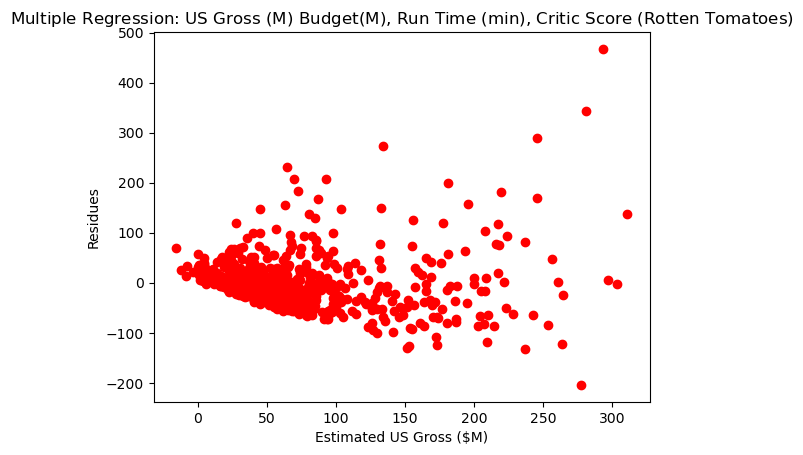

In [15]:
plt.figure()
plt.scatter(y_hat, residues, color='r');
plt.xlabel('Estimated US Gross ($M)')
plt.ylabel('Residues')
plt.title('Multiple Regression: US Gross ($M) ~ Budget ($M), Run Time (min), Critic Score (Rotten Tomatoes)');

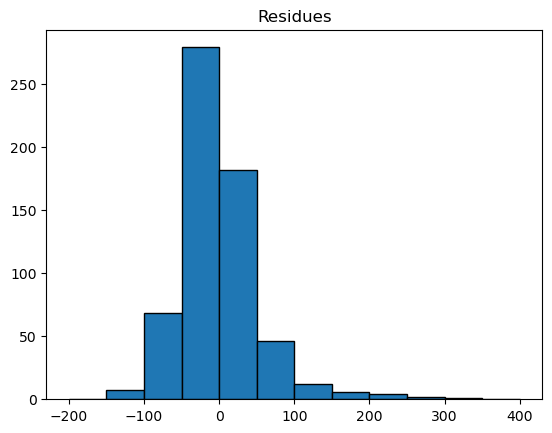

In [16]:
plt.hist(residues, bins=np.linspace(-200, 400, 13), edgecolor='k')
plt.title("Residues");

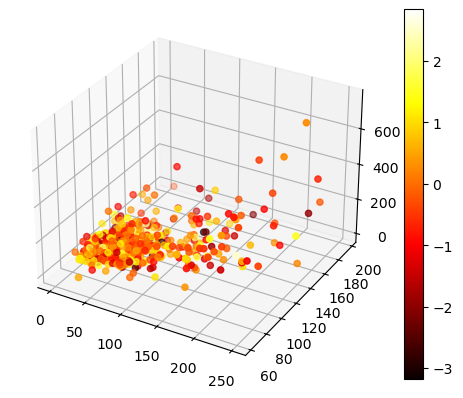

In [17]:
#%matplotlib notebook
#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(movie_profits['budget'])
y = np.array(movie_profits['runtime'])
z = np.array(movie_profits['gross'])

a = movie_profits['critics']

colors = np.random.standard_normal(len(a))
img = ax.scatter(x, y, z, c=colors, cmap=plt.hot())
fig.colorbar(img)
plt.show()

**a) Linearity condition**

**Answer:** the scatterplot is not straight enought and with obvious outliers.  In addition, the residual plot shows thickening pattern and the the residuals do not have a consistent spread. The residual plot of the data does not show a consistent satisfaction of the linearity condition. 

**b) Nearly Normal condition**

**Answer:** the histogram of the residuals of the distribution is unimodal, however, it is not symmetric.

**c) Equal Spread condition**

**Answer:** the plot of residuals against estimated US gross ($M) is thickening. Some of the residuals seem unusually large and could deserve more attention.

**Problem 7. Movie profits once more Look back at the regression in Exercise 3. Here is the partial regression plot for the coefficient of Budget.**

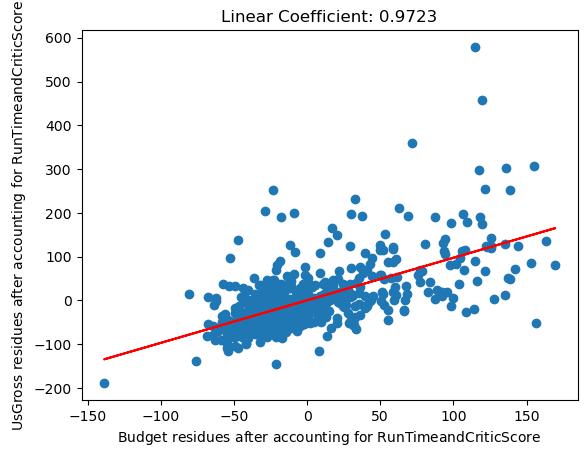

In [18]:
linmod.fit(movie_profits[ ['runtime', 'critics'] ], movie_profits['gross'])
gross_residues = movie_profits['gross'] - linmod.predict( movie_profits[ ['runtime', 'critics'] ] )

linmod.fit(movie_profits[['runtime','critics']], movie_profits['budget'])
budget_residues = movie_profits['budget'] - linmod.predict( movie_profits[['runtime','critics']] )

plt.scatter(budget_residues, gross_residues)
plt.ylabel('$UsGross$ residues after accounting for $Run Time and Critic Score$')
plt.xlabel('$Budget$ residues after accounting for $Run Time and Critic Score$')

linmod.fit(np.array(budget_residues).reshape(-1,1), gross_residues)
plt.title(f'Linear Coefficient: {linmod.coef_[0]:.4f}')
plt.plot(budget_residues, linmod.predict(np.array(budget_residues).reshape(-1,1)), 'r');

**a) What is the slope of the least squares regression line in the partial regression plot?**

**Answer:** the above computed linear coefficient is the same as the Budget coefficient. Therefore, the slope of the least square regression is 0.9723.

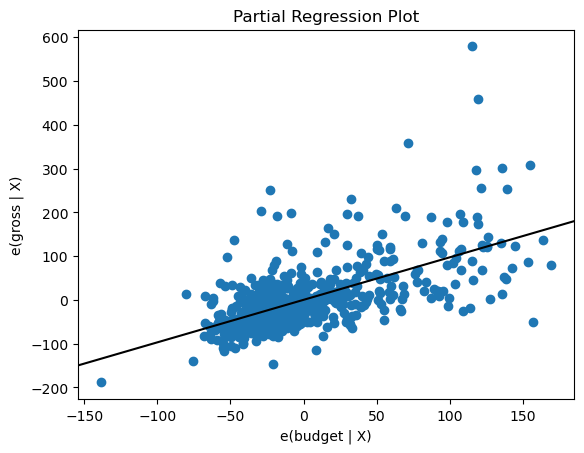

In [19]:
sm.graphics.plot_partregress(endog='gross', exog_i='budget',
                             exog_others=['runtime', 'critics'],
                             data=movie_profits,
                             obs_labels=False);

In [20]:
movie_profits[movie_profits.Movie == 'Avatar']

,Year,Movie,gross,budget,runtime,critics
365,2009,Avatar,760.507625,237.0,160,83


In [21]:
movie_profits = movie_profits.drop(365)

In [22]:
movie_profits

,Year,Movie,gross,budget,runtime,critics
0,2012,Django Unchained,162.805434,100.0,165,88
1,2012,Parental Guidance,77.264926,25.0,105,18
2,2012,The Impossible,19.019882,40.0,114,81
3,2012,Jack Reacher,80.070736,60.0,130,61
4,2012,This is 40,67.544505,35.0,134,51
...,...,...,...,...,...,...
604,2008,Mad Money,20.688843,22.0,104,22
605,2008,27 Dresses,76.808654,30.0,111,41
606,2008,Cloverfield,80.048433,25.0,85,77
607,2008,In the Name of the King: A Dungeon Siege Tale,4.775656,60.0,127,4


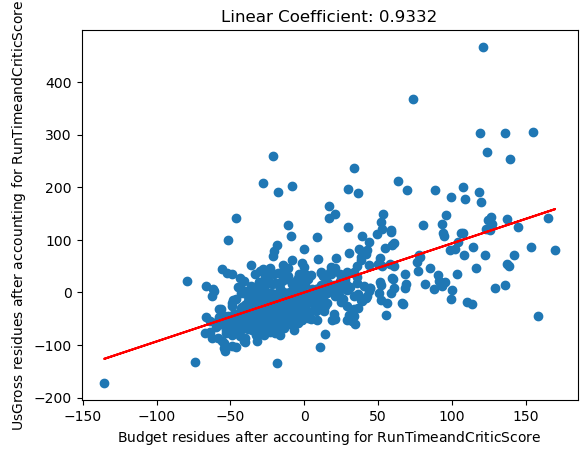

In [23]:
linmod.fit(movie_profits[ ['runtime', 'critics'] ], movie_profits['gross'])
gross_residues = movie_profits['gross'] - linmod.predict( movie_profits[ ['runtime', 'critics'] ] )

linmod.fit(movie_profits[['runtime','critics']], movie_profits['budget'])
budget_residues = movie_profits['budget'] - linmod.predict( movie_profits[['runtime','critics']] )

plt.scatter(budget_residues, gross_residues)
plt.ylabel('$UsGross$ residues after accounting for $Run Time and Critic Score$')
plt.xlabel('$Budget$ residues after accounting for $Run Time and Critic Score$')

linmod.fit(np.array(budget_residues).reshape(-1,1), gross_residues)
plt.title(f'Linear Coefficient: {linmod.coef_[0]:.4f}')
plt.plot(budget_residues, linmod.predict(np.array(budget_residues).reshape(-1,1)), 'r');

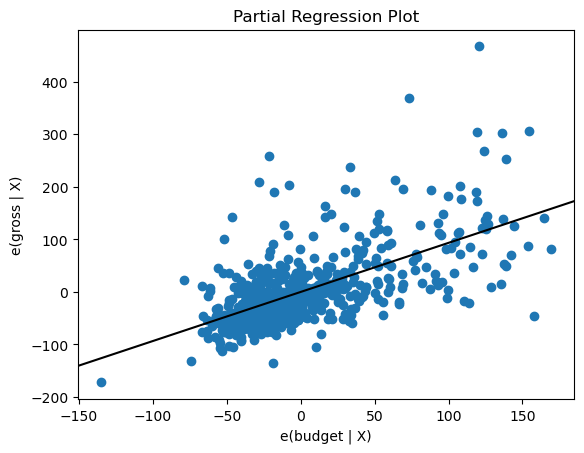

In [24]:
sm.graphics.plot_partregress(endog='gross', exog_i='budget',
                             exog_others=['runtime', 'critics'],
                             data=movie_profits,
                             obs_labels=False);

**b) The point plotted with a red “x” is the movie Avatar, which had an extraordinarily large budget. If that movie were removed from the data, how would that affect the coefficient of Budget in the multiple regression?**


i. It would get larger (more positive). 
ii. It would get smaller.
iii. It would become zero.
iv. We can’t tell from this graph.

**Answer** after removed the movie Avatar, the coefficient of Budget is 0.9332, therefore, the coefficient of Budget gets smaller.

<font color="red"> The red cross outlier lies to the northest of the partial regression line.  Think of it as an influence point, whose existence tilts the line upwards.  Removing it would flatten the line slightly, resulting in a smaller coefficient. </font>